In [1]:
import pandas as pd
import hashlib
from rdkit import Chem
from rdkit.Chem import AllChem
from metatlas import make_df_with_molecules_from_csv, psi4_xyzfile_to_psi4mol
from tqdm import tqdm_notebook as tqdm
import psi4

CSV_FILE = 'chebi_and_metacyc_molecules.csv'

In [2]:
molecules = make_df_with_molecules_from_csv(CSV_FILE)

In [26]:
import pybel

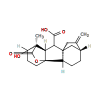

In [31]:
pybel.readstring('smi', molecules.loc[0, 'sanitized_smiles'], opt={})

In [20]:
for i in tqdm(range(0,40)):
    mol = molecules.loc[i, 'molecule']
    m2 = Chem.AddHs(mol)
    if AllChem.EmbedMolecule(m2) < 0:
        print 'oh no {}'.format(i)


oh no 0
oh no 19
oh no 22



RuntimeError: Invariant Violation
	bad lower bound
	Violation occurred on line 192 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
	Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
	RDKIT: 2016.09.4
	BOOST: 1_56


In [22]:
Chem.rdMolDescriptors.CalcMolFormula(mol)

'C6H9*2NO3'

In [71]:
mol = molecules.loc[2342, 'molecule']
m2 = Chem.AddHs(mol)

AllChem.EmbedMolecule(m2)
Chem.MolToMolFile(m2, 'mol.mol')

conf = m2.GetConformer()

natoms = m2.GetNumAtoms()
for idx in range(natoms):
    atom = m2.GetAtomWithIdx(idx)
    xyz = conf.GetAtomPosition(idx)
    print 'Index={}, Symbol={}, x={}, y={}, z={}'.format(atom_index, atom.GetSymbol(), xyz.x, xyz.y, xyz.z)

Index=0, Symbol=C, x=11.7451245443, y=-2.21385897352, z=-0.079860744166
Index=0, Symbol=C, x=10.7715101053, y=-1.39105619801, z=-0.912466132819
Index=0, Symbol=C, x=10.6259641126, y=-0.0210668979682, z=-0.274989268983
Index=0, Symbol=C, x=9.17592473084, y=0.402633002677, z=-0.425107105619
Index=0, Symbol=C, x=8.32358325196, y=-0.629453933839, z=0.263730676322
Index=0, Symbol=C, x=7.24313386216, y=-0.0150877119592, z=1.11182386796
Index=0, Symbol=C, x=5.86659514476, y=-0.454354237537, z=0.656950609535
Index=0, Symbol=C, x=5.17210949963, y=0.619864601605, z=-0.161403088276
Index=0, Symbol=C, x=4.13187085756, y=1.34370819702, z=0.644471912606
Index=0, Symbol=C, x=2.7244215202, y=0.901173639159, z=0.335011032236
Index=0, Symbol=C, x=2.39225333017, y=0.979534822413, z=-1.12910818889
Index=0, Symbol=C, x=1.19450162768, y=1.83537825941, z=-1.42888645125
Index=0, Symbol=C, x=0.0251370879645, y=1.57143049871, z=-0.524924075184
Index=0, Symbol=C, x=-0.290729291397, y=0.102847756703, z=-0.3772415

In [ ]:
""" Likely main.py structure """
for index, row in tqdm(molecules.iterrows()):
    if row['molecule']:
        
        
for row in range(df.len-1):
    smi, fname = df.loc[row, 'sanitized_smiles'], df.loc[row, 'formula']+'.xyz'
    mol = psi4_xyzfile_to_psi4mol(smi, fname)
    
    psi4.optimize('pbeh3c/def-svp', molecule=mol)

In [1]:
smi, fname = df.loc[4, 'sanitized_smiles'], df.loc[4, 'formula']+'.xyz'
mol = psi4_xyzfile_to_psi4mol(smi, fname)


psi4.optimize('pbeh3c/def2-svp', molecule=mol)

NameError: name 'df' is not defined

In [3]:
psi4.set_num_threads(8)
psi4.set_variable('print', 5)
mol = psi4_xyzfile_to_psi4mol('C3H10NO2+.xyz')

e, wfn = psi4.optimize('pbe/def2-svp', molecule=mol, return_wfn='on')

Optimizer: Optimization complete!


In [ ]:
wfn.iterations()